In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

In [2]:
df1 = pd.DataFrame( pd.read_csv("meteo-nogal-09.csv", engine="python" ) )

df2 = pd.DataFrame( pd.read_csv("soil-nogal-09.csv", engine="python" ) )


In [3]:
df1=df1.drop(df1.columns[df1.columns.str.contains('unnamed:',case = False)],axis = 1)
df1 = df1.drop(df1.index[0]).reset_index(drop=True)

In [4]:
df1["FECHAS"] = df1["DATE"] +" "+ df1["TIME"]


In [5]:
df1['FECHA'] = pd.to_datetime(df1['FECHAS'], dayfirst=True)

In [6]:
df1['MES'] = df1["FECHA"].dt.month
df1['DIA'] = df1['FECHA'].dt.day
df1['HORA'] = df1['FECHA'].dt.hour
df1['MINUTO'] = df1['FECHA'].dt.minute
df1 = df1.drop(df1.index[0:2]).reset_index(drop=True)
df1.head()


,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,...,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHAS,FECHA,MES,DIA,HORA,MINUTO
0,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,...,0.896,1.152,1.032,7.926001,01-01-09 00:30,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
1,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,...,0.874,1.152,1.008,7.737,01-01-09 00:40,2009-01-01 00:40:00,1.0,1.0,0.0,40.0
2,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,...,0.859,1.119,0.961,7.39,01-01-09 00:50,2009-01-01 00:50:00,1.0,1.0,0.0,50.0
3,01-01-09,01:00,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,...,0.840,1.097,0.9210001,7.089,01-01-09 01:00,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
4,01-01-09,01:10,0.611,0.7270001,-0.126,8.72,1.5,-180.6,23.71,-26.72,...,0.832,1.084,0.901,6.943,01-01-09 01:10,2009-01-01 01:10:00,1.0,1.0,1.0,10.0


In [7]:
df1 = df1[((df1['MINUTO'] == 30.0) | (df1['MINUTO'] == 0.0) ) & (df1['FECHAS']<'2010-01-01 00:30:00')]
df1= df1.reset_index(drop=True)


In [8]:
df2 = df2.filter(['2 Year_RTM  L','3 Day_RTM  L','4 Hour_Minute_RTM  L','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm'
                  ,'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)


In [9]:
df2['4 Hour_Minute_RTM  L'] = df2['4 Hour_Minute_RTM  L'].astype(str)


In [10]:
hora=[]
minuto=[]

for i in range (0, len(df2)):
    if (len(str(df2['4 Hour_Minute_RTM  L'][i]))==4):
        if (str(df2['4 Hour_Minute_RTM  L'][i])[0:2]=='24'):
            hora.append('00')
            minuto.append('00')
        else:
            hora.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[2:4])
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==3):
            hora.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:1])
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[1:3])
    elif (len(str(df2['4 Hour_Minute_RTM  L'][i]))==2):
            hora.append('00')
            minuto.append(str(df2['4 Hour_Minute_RTM  L'][i])[0:2])

dias =[df2['3 Day_RTM  L'][i] for i in range(0,len(df2))]

In [11]:
d = {'dias': dias, 'hora': hora, 'minuto':minuto}
df_fechas = pd.DataFrame(data=d)
df_fechas.head()

,dias,hora,minuto
0,1,00,30
1,1,1,00
2,1,1,30
3,1,2,00
4,1,2,30


In [12]:
dia=[]
for i in range(0,len(df_fechas)):
    if (df_fechas['hora'][i]=='00' and df_fechas['minuto'][i]=='00'):
        dia.append(df_fechas['dias'][i] +1)
    else:
        dia.append(df_fechas['dias'][i])
df_fechas['dia']=dia

In [13]:
fechas = []
for i in range (0,len(df2)):
    fechas.append('2009 '+str(df_fechas['dia'][i])+ ' ' + df_fechas['hora'][i]+' '+df_fechas['minuto'][i])

In [14]:
FECHA = []
for i in range(0,len(df2)):
    d=datetime.datetime.strptime(fechas[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    FECHA.append(F)
df2['FECHAN']=FECHA    

In [15]:
df2['FECHA'] = pd.to_datetime(df2['FECHAN'], dayfirst=True)

In [17]:
df2 = df2.drop_duplicates(subset=['FECHA'])
df1 = df1.drop_duplicates(subset=['FECHA'])


In [19]:
df3 = pd.merge(df1, df2, on=['FECHA'])
df3 = df3.filter(['FECHA','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm'
                  ,'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm','t_Avg','air_Avg','net_rad_Avg','airT_Avg'],axis=1)


In [21]:
df3['MES'] = df3["FECHA"].dt.month
df3['DIA'] = df3['FECHA'].dt.day
df3['HORA'] = df3['FECHA'].dt.hour
df3['MINUTO'] = df3['FECHA'].dt.minute


In [89]:
df3['airT_Avg'] = df3['airT_Avg'].apply(lambda col:pd.to_numeric(col))


In [32]:
df_graf1=df3[df3['FECHA']<'2009-01-02 00:00:00']


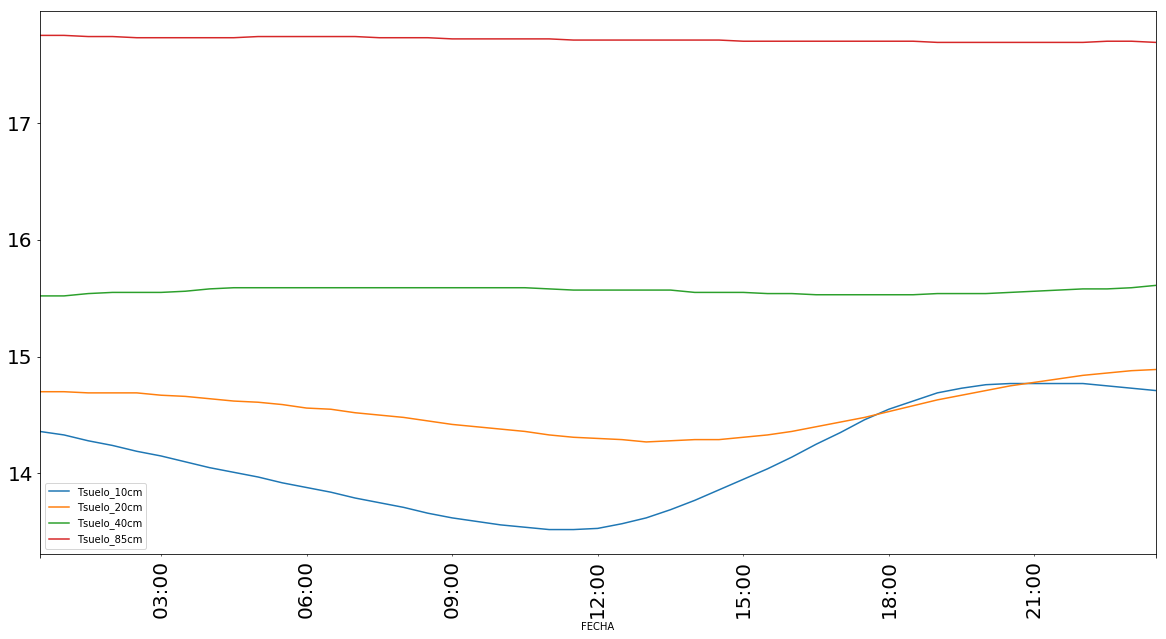

In [33]:
df_graf1.plot(x="FECHA",y=['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_40cm',
                            'Tsuelo_85cm'],figsize=(20,10),rot=90,fontsize=20)


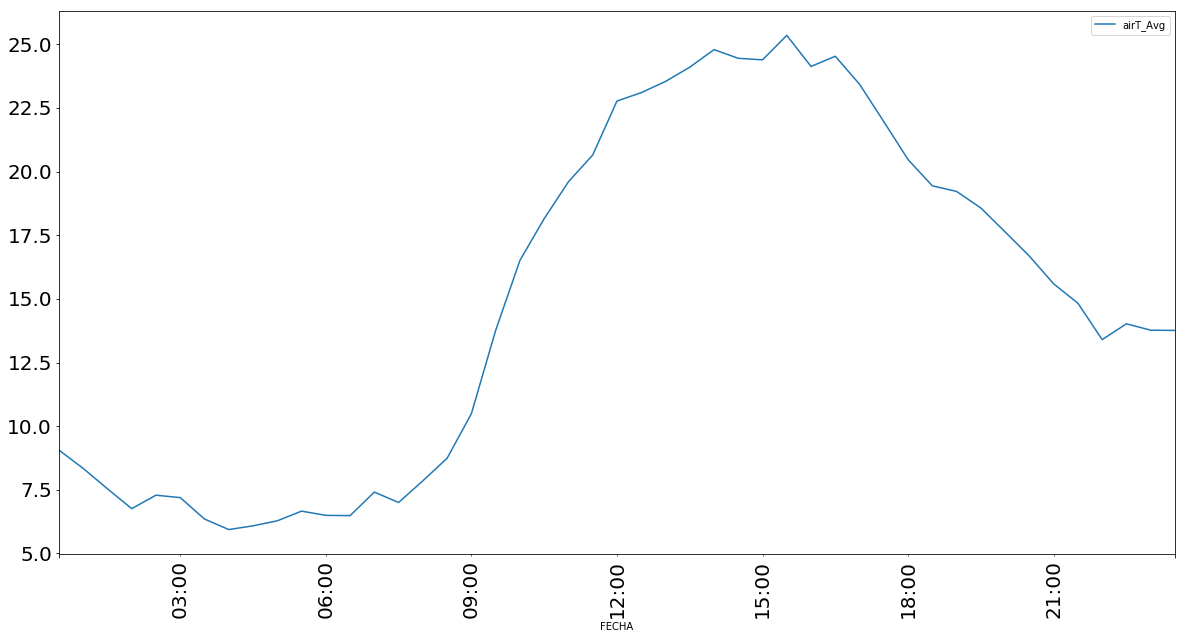

In [90]:

df_graf1.plot(x="FECHA",y="airT_Avg",figsize=(20,10),rot=90,fontsize=20)


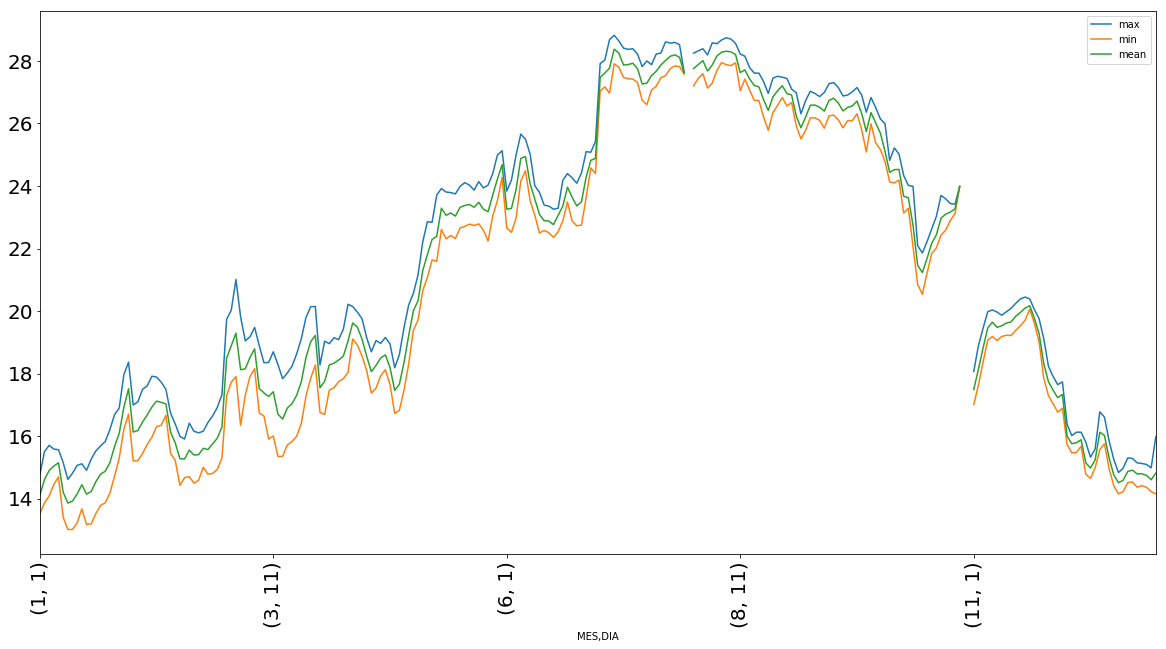

In [83]:
df3_10= df3.groupby([df3["MES"],df3["DIA"]])['Tsuelo_10cm'].agg({"max","min","mean"})
df3_10.plot(y=["max","min","mean"],figsize=(20,10),rot=90,fontsize=20)


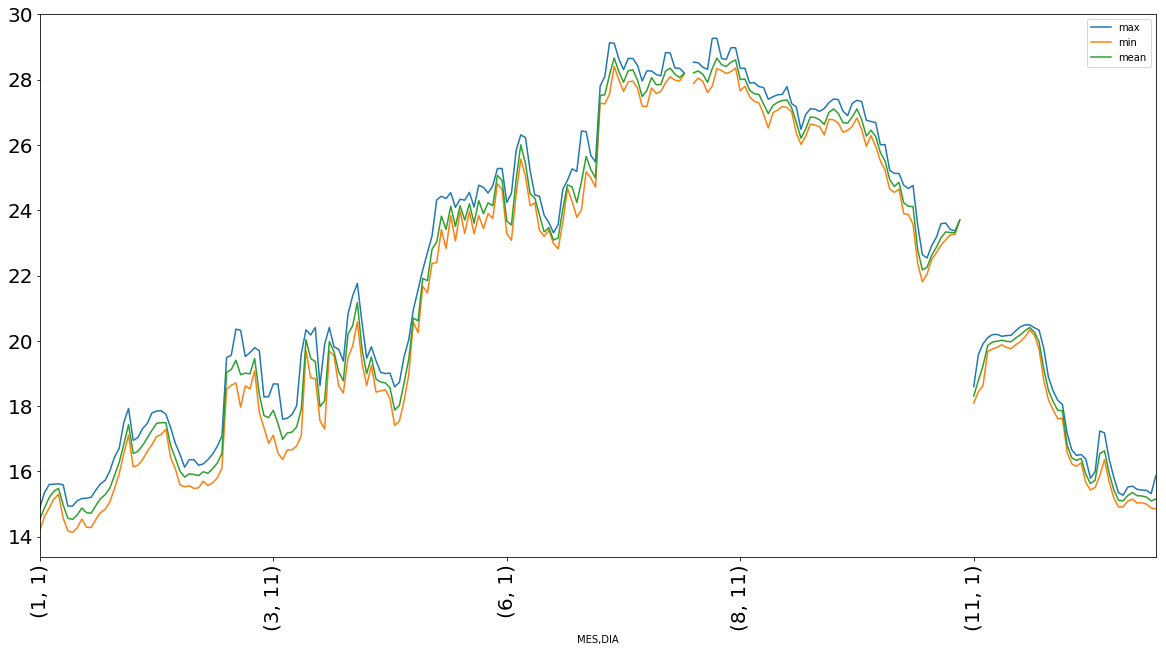

In [84]:
df3_20= df3.groupby([df3["MES"],df3["DIA"]])['Tsuelo_20cm'].agg({"max","min","mean"})
df3_20.plot(y=["max","min","mean"],figsize=(20,10),rot=90,fontsize=20)


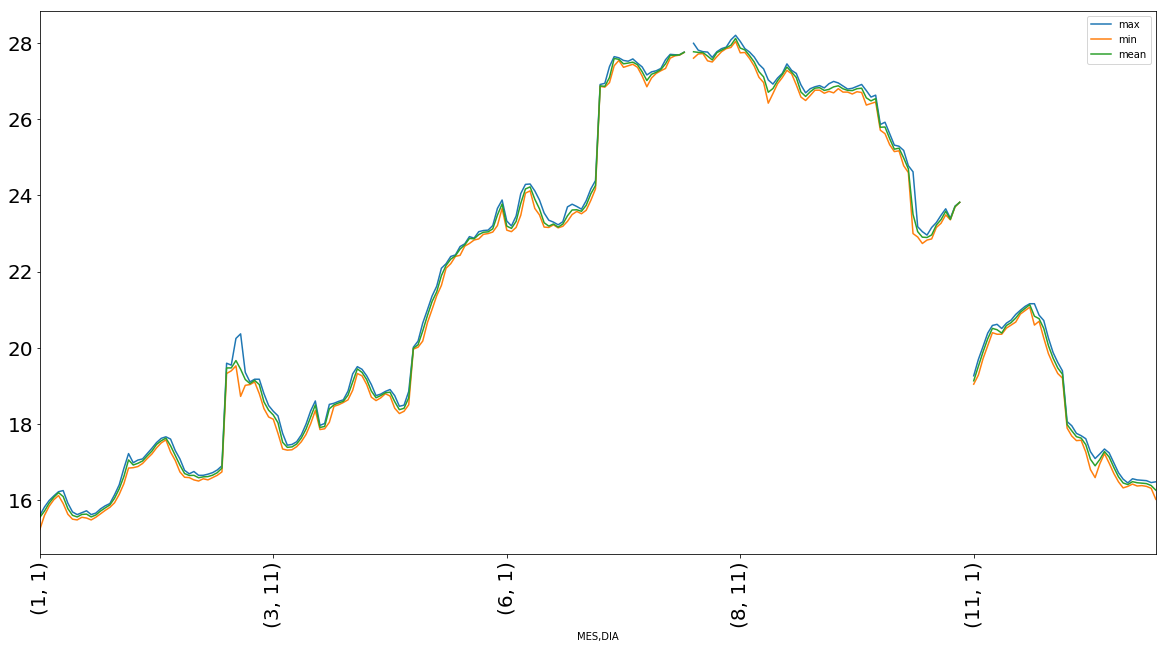

In [85]:
df3_40= df3.groupby([df3["MES"],df3["DIA"]])['Tsuelo_40cm'].agg({"max","min","mean"})
df3_40.plot(y=["max","min","mean"],figsize=(20,10),rot=90,fontsize=20)


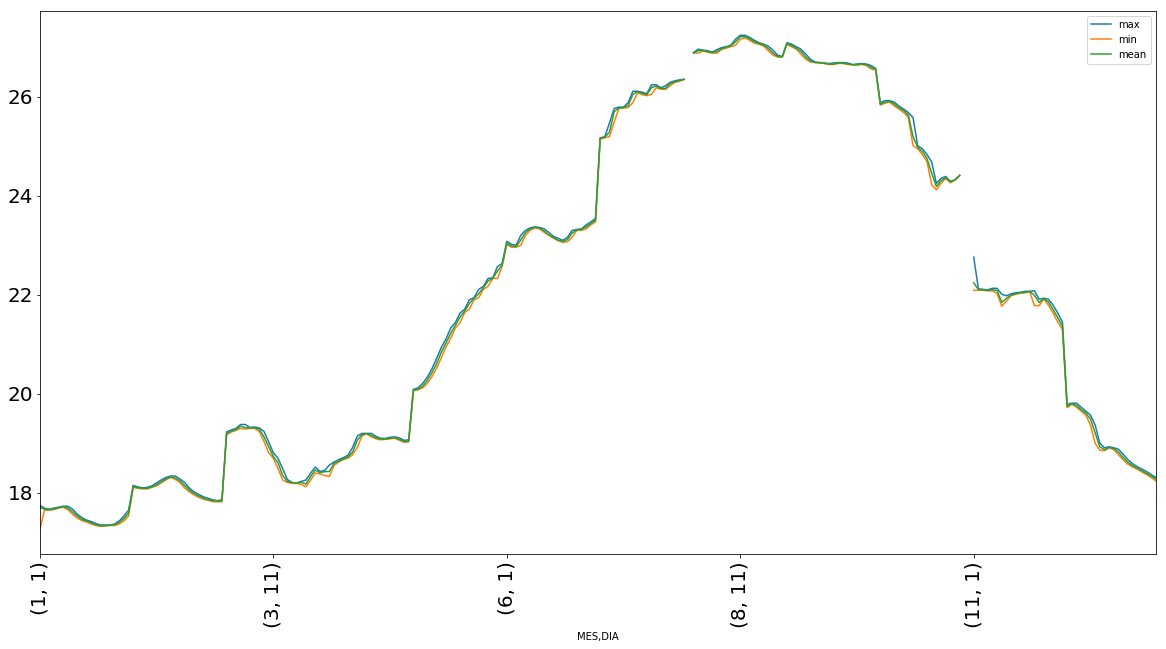

In [86]:
df3_85= df3.groupby([df3["MES"],df3["DIA"]])['Tsuelo_85cm'].agg({"max","min","mean"})
df3_85.plot(y=["max","min","mean"],figsize=(20,10),rot=90,fontsize=20)


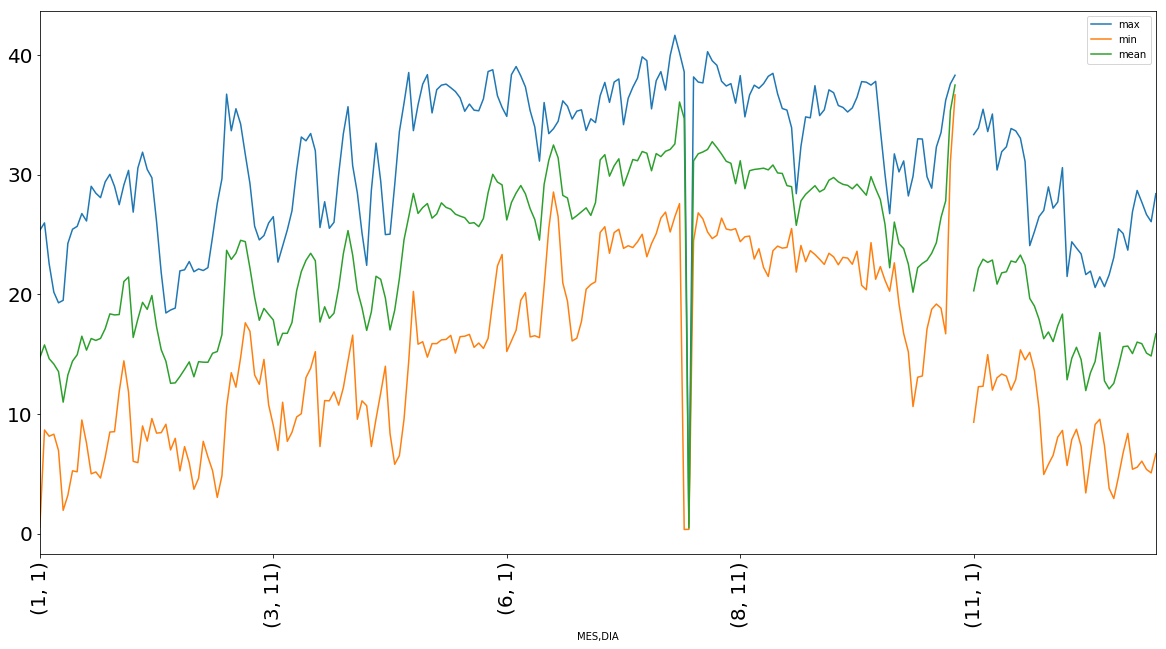

In [91]:
df3_air= df3.groupby([df3["MES"],df3["DIA"]])['airT_Avg'].agg({"max","min","mean"})
df3_air.plot(y=["max","min","mean"],figsize=(20,10),rot=90,fontsize=20)

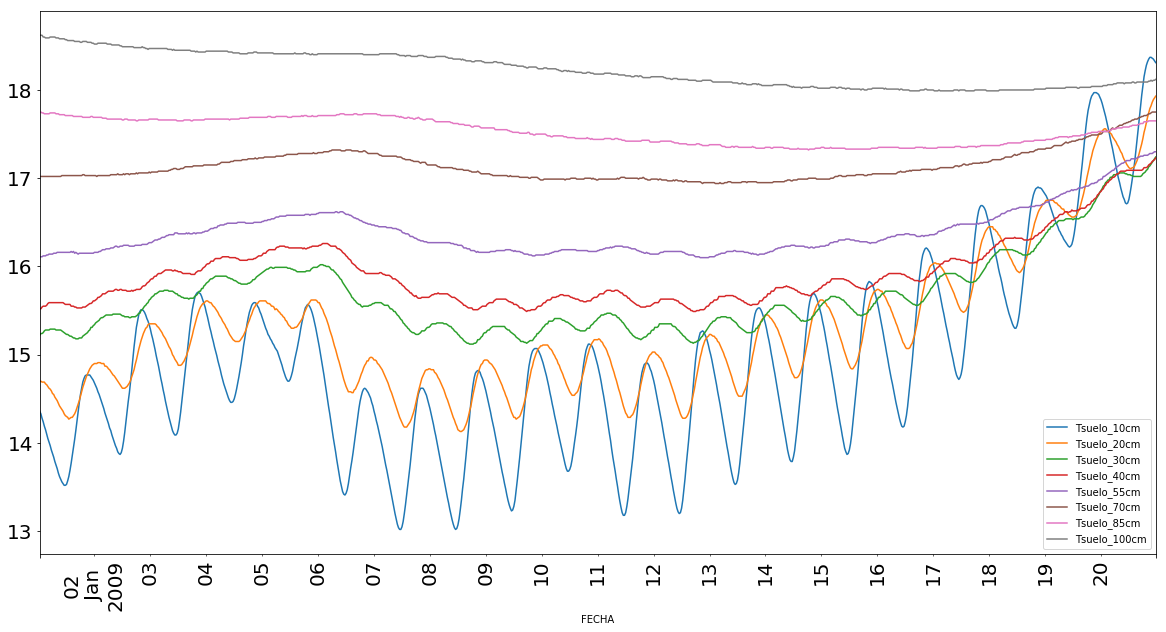

In [100]:
df_graf3=df3[df3['FECHA']<'2009-02-01 00:00:00']
df_graf3.plot(x="FECHA",y=['Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm',
                              'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],figsize=(20,10),rot=90,fontsize=20)

Text(0.5, 1.0, 'Comparación de UF24 Y HF')

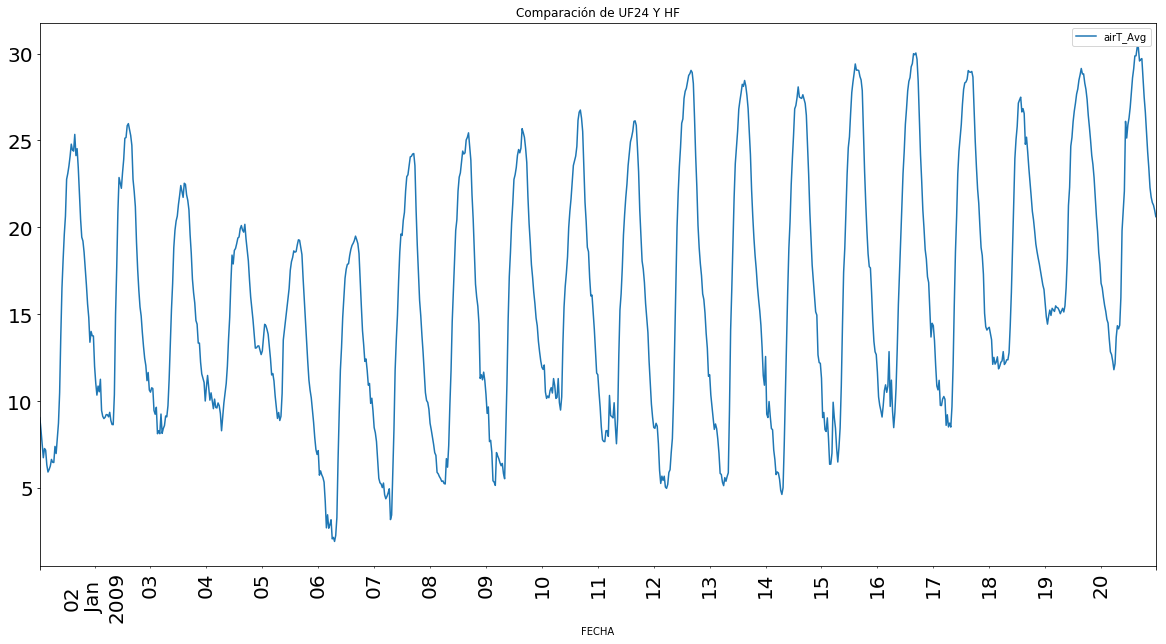

In [104]:
df_graf3.plot(x="FECHA",y="airT_Avg",figsize=(20,10),rot=90,fontsize=20)
plt.title("Comparación de UF24 Y HF")